# Flood Prediction Machine Learning Model

This is for displaying tabular data in a visually appealing ASCII table format

In [ ]:
!pip install prettytable

This is for loading the data set.

In [ ]:
# Import necessary libraries
import pandas as pd
from tabulate import tabulate
from IPython.display import HTML

# Load the dataset
file_path = '/content/kerala.csv'  # Update this path with the actual path to your CSV file
df = pd.read_csv(file_path)

# Display the dataset in an aesthetically pleasing manner
def display_entire_dataframe(df):
    # Convert the DataFrame to a nicely formatted HTML table
    html_table = df.to_html(classes='table table-striped table-bordered', index=False)
    return HTML(html_table)

# Call the function to display the table
display_entire_dataframe(df)

This is for checking missing values in the data set.

In [ ]:
# Import necessary libraries
import pandas as pd
from IPython.display import HTML

# Load the dataset
file_path = '/content/sample_data/kerala.csv'
df = pd.read_csv(file_path)

# Function to display missing values in the dataset
def display_missing_values(df):
    missing_values = df.isnull().sum()
    missing_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
    missing_html = missing_df.to_html(classes='table table-striped table-bordered', index=False)
    styled_missing_html = f"""
    <style>
        .table {{
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            width: 100%;
        }}
        .table th {{
            background-color: #b3cde0;
            color: #03396c;
            border: 1px solid #6497b1;
            text-align: center;
            padding: 8px;
        }}
        .table td {{
            background-color: #e0f7fa;
            color: #03396c;
            border: 1px solid #6497b1;
            text-align: center;
            padding: 8px;
        }}
        .table tr:nth-child(even) td {{
            background-color: #f2f2f2;
        }}
    </style>
    {missing_html}
    """
    return HTML(styled_missing_html)

# Call the function to display missing values
display(display_missing_values(df))

No missing value.

This is for standardization of the dataset for Convergence, Equal Weight of Features, Stabilizing Numerical Computations and many more.


In [ ]:
# Import necessary libraries
import pandas as pd
from IPython.display import HTML
from sklearn.preprocessing import StandardScaler
# Load the dataset
file_path = '/content/sample_data/kerala.csv'
df = pd.read_csv(file_path)

scaler = StandardScaler()

# Apply standardization
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Function to display the standardized data
def display_standardized_data(df, num_rows=5):
    standardized_html = df.head(num_rows).to_html(classes='table table-striped table-bordered', index=False)
    styled_standardized_html = f"""
    <style>
        .table {{
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            width: 100%;
        }}
        .table th, .table td {{
            padding: 8px;
            border: 1px solid #6497b1;
            text-align: center;
            vertical-align: middle;
        }}
        .table th {{
            background-color: #b3cde0;
            color: #03396c;
        }}
        .table td {{
            background-color: #e0f7fa;
            color: #03396c;
        }}
        .table tr:nth-child(even) td {{
            background-color: #f2f2f2;
        }}
    </style>
    {standardized_html}
    """
    return HTML(styled_standardized_html)

# Display the standardized data
display(display_standardized_data(df))

Exploratory Data Analysis (EDA)

This is performing basic statistical operation on the dataset.

In [ ]:
# Import necessary libraries
import pandas as pd
from IPython.display import display, HTML

# Load the dataset
file_path = '/content/sample_data/kerala.csv'  # Update this path with the actual path to your CSV file
df = pd.read_csv(file_path)

# Function to display summary statistics for numerical features
def display_summary(df):
    summary = df.describe()
    styled_summary = summary.style.set_table_styles(
        [{'selector': 'thead th',
          'props': [('background-color', '#b3cde0'),
                    ('color', '#03396c'),
                    ('border', '1px solid #6497b1'),
                    ('font-size', '14px'),
                    ('text-align', 'center')]},
         {'selector': 'tbody td',
          'props': [('background-color', '#e0f7fa'),
                    ('color', '#03396c'),
                    ('border', '1px solid #6497b1'),
                    ('font-size', '12px'),
                    ('text-align', 'center')]},
         {'selector': 'tbody tr:nth-child(even) td',
          'props': [('background-color', '#f2f2f2')]}]
    ).set_caption("Summary Statistics for Numerical Features")

    return styled_summary

# Call the function to display the summary statistics
display(display_summary(df))

Visualizations


Pairplot for visualizing the relationships between features in a dataset

First row first column type: histogram

First row second column type: KDE

Second row first column type: Scatterplot

<Figure size 1000x1000 with 0 Axes>

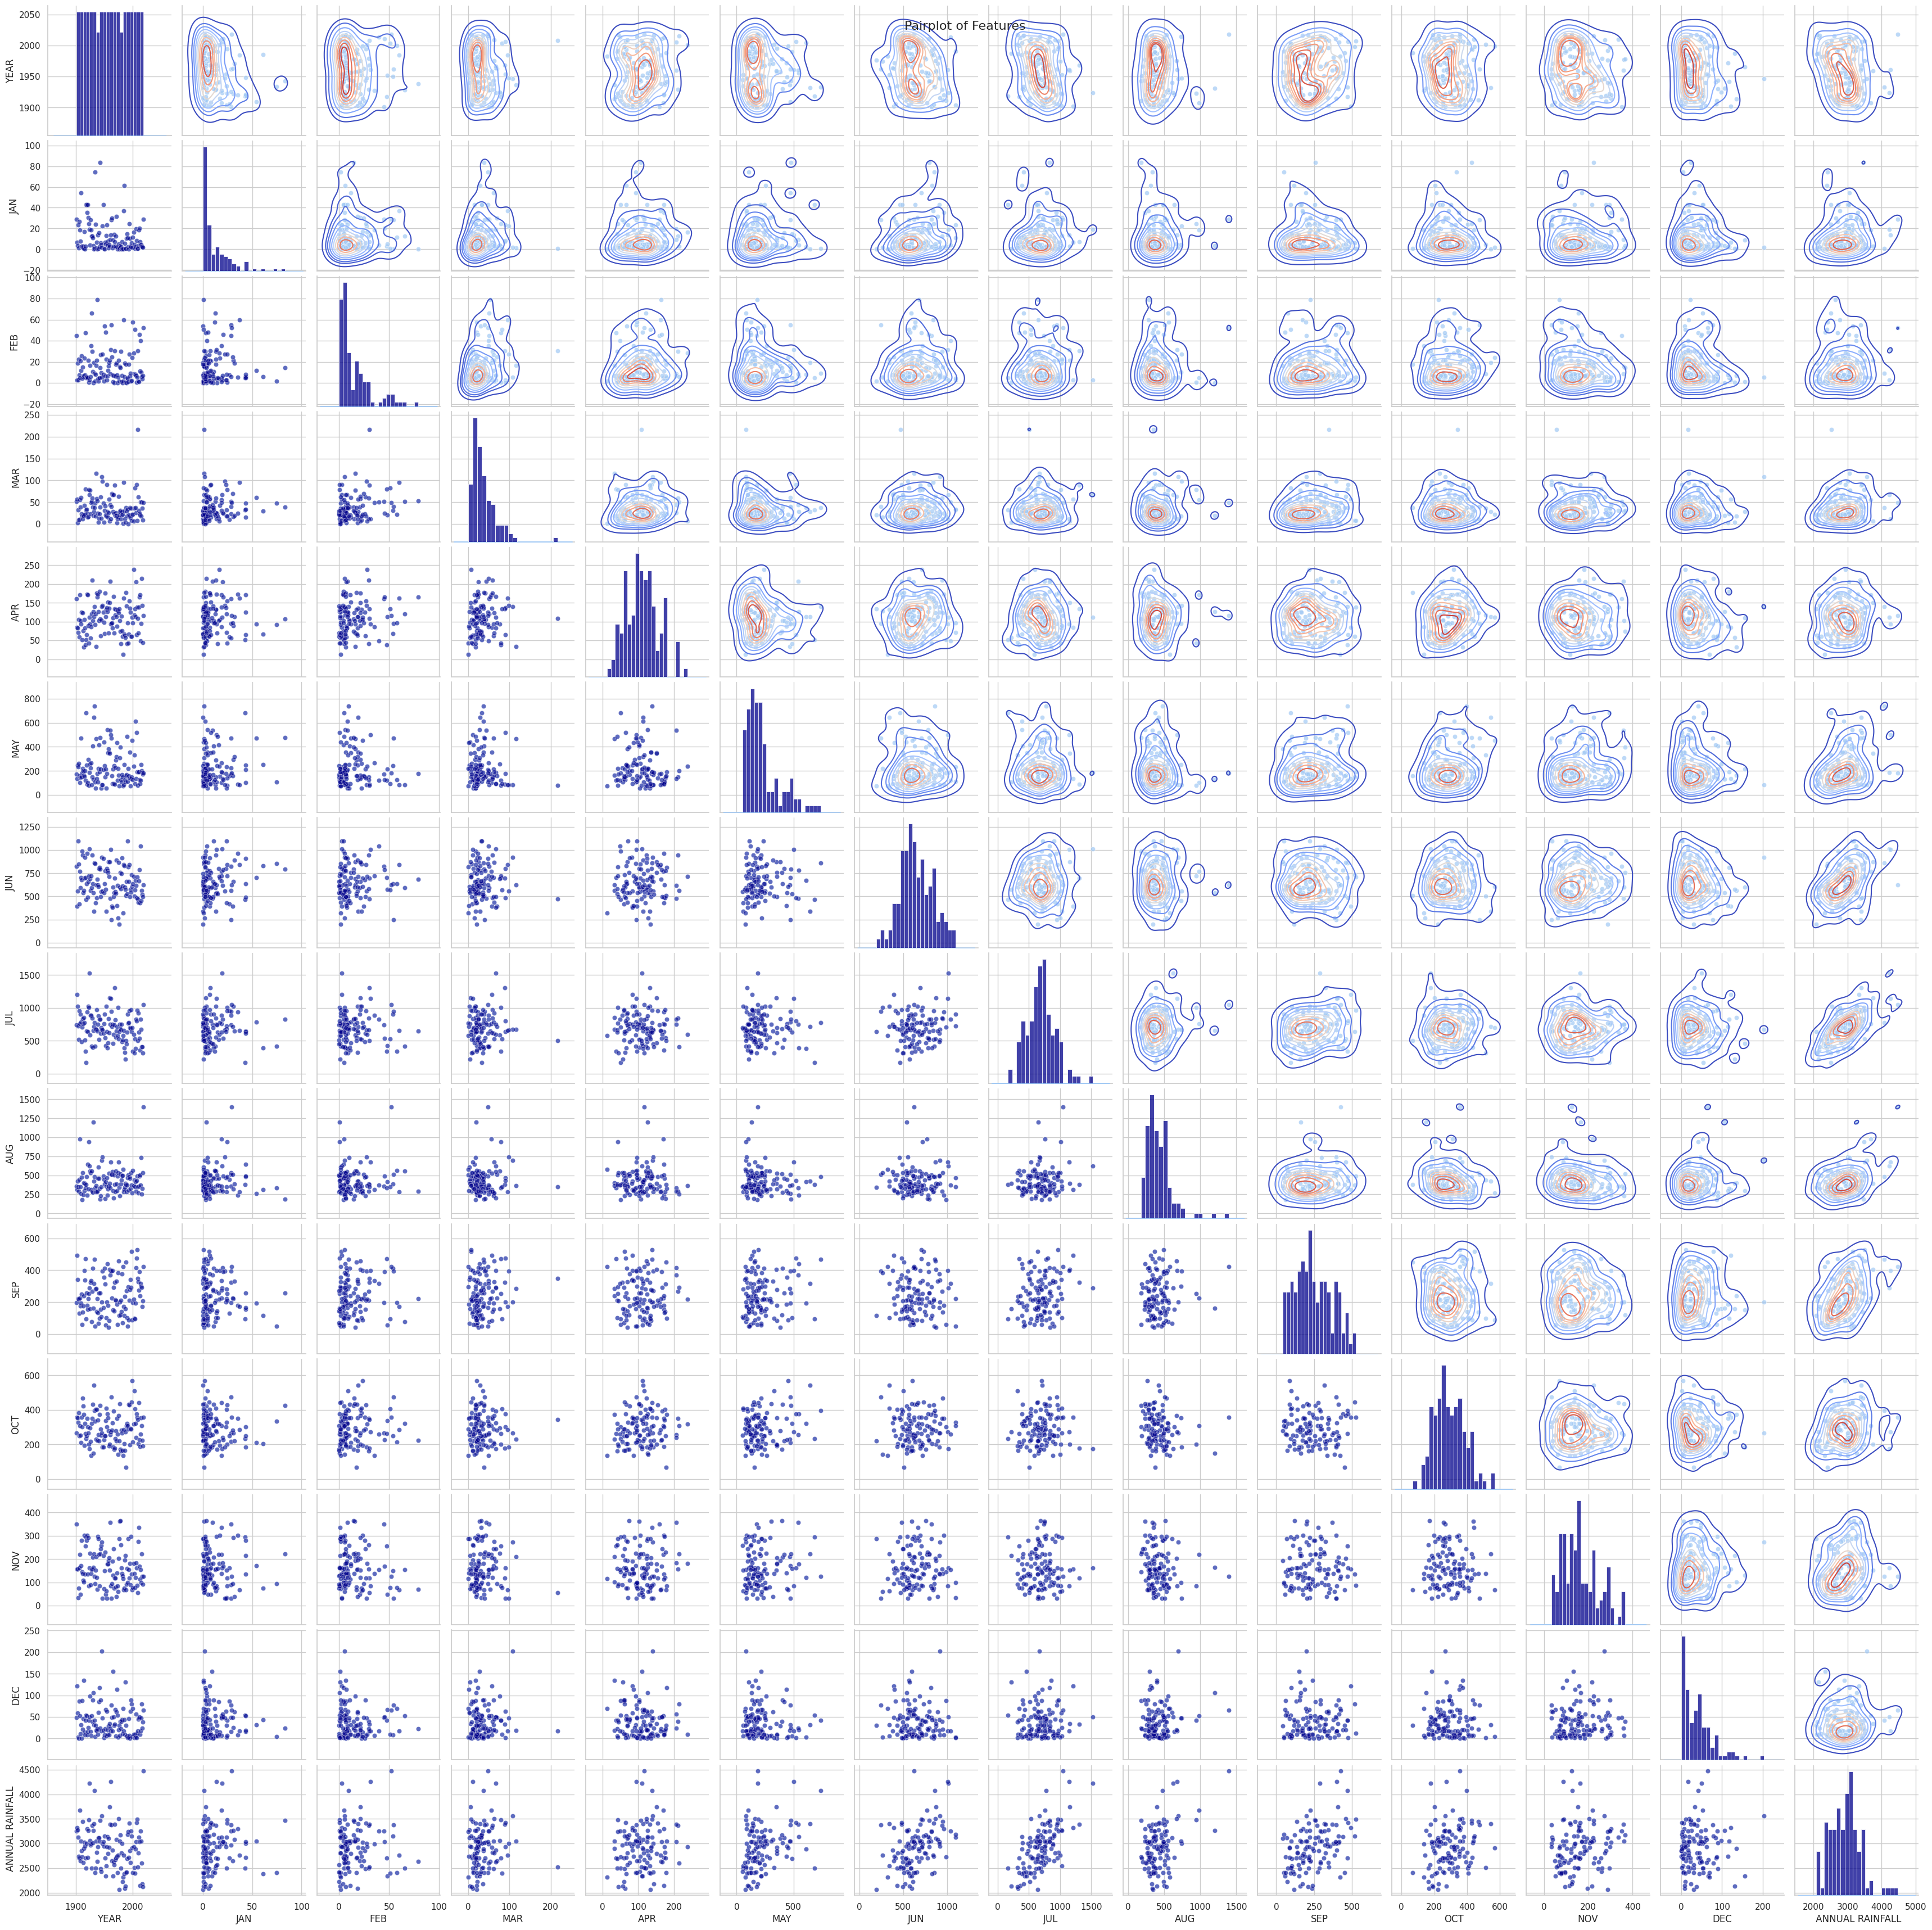

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sample_data/kerala.csv'
df = pd.read_csv(file_path)

# Set a vibrant aesthetic style
sns.set(style="whitegrid", palette="pastel")

# Pairplot
plt.figure(figsize=(10, 10))
pairplot = sns.pairplot(df, diag_kind='kde', markers='o', plot_kws={'alpha': 0.7})
pairplot.map_upper(sns.kdeplot, cmap="coolwarm")
pairplot.map_lower(sns.scatterplot, color='darkblue', alpha=0.5)
pairplot.map_diag(sns.histplot, bins=20, color='darkblue')
plt.suptitle('Pairplot of Features', size=16)
plt.show()

Heatmap for visualizing the correlation matrix of the numerical features in the dataset

1 - perfect positive linear relationship.

-1 - a perfect negative linear relationship.

0 - no linear relationship.

Heatmap Color Scale:

Shades of blue - negative correlations.

Shades of red - positive correlations.

The intensity of the color represents the strength of the correlation.

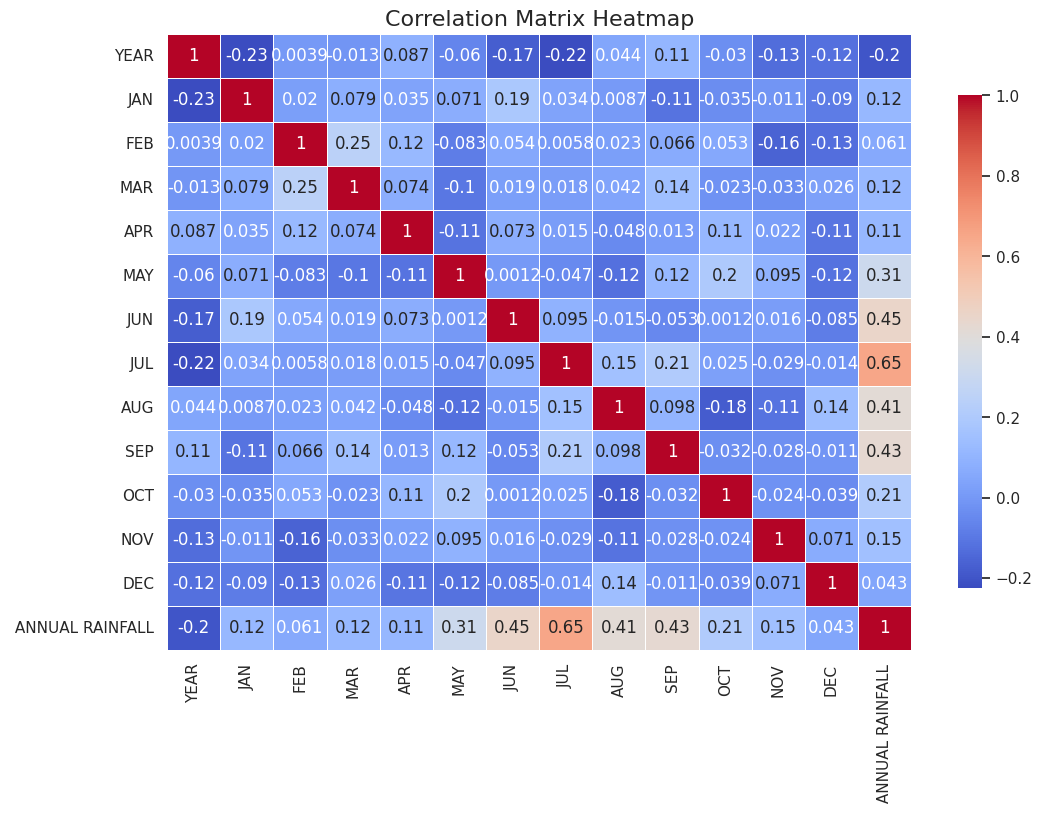

In [ ]:
# Heatmap
# Selecting only numerical columns for the heatmap
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix Heatmap', size=16)
plt.show()

Histogram

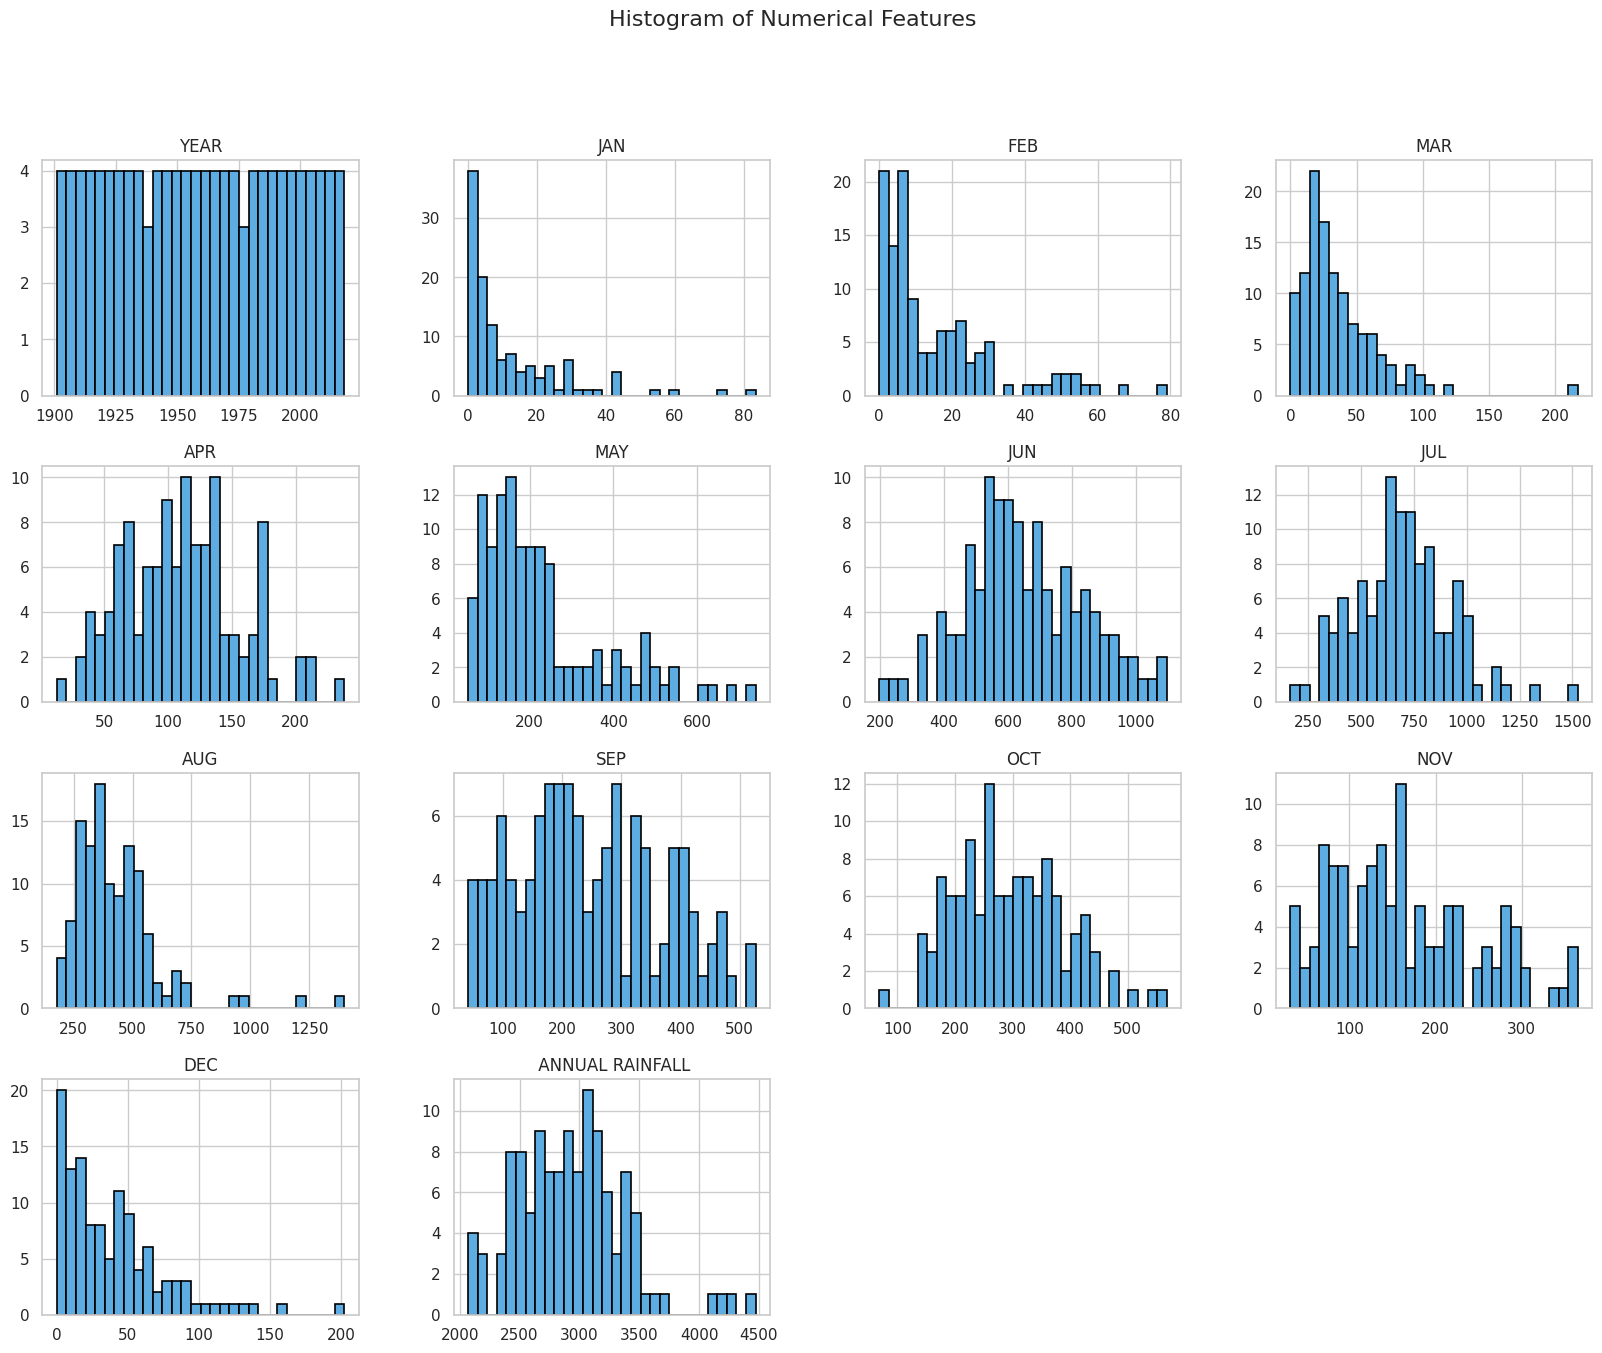

In [ ]:
# Histogram
df.hist(bins=30, figsize=(20, 15), color='#5DADE2', edgecolor='black', linewidth=1.2)
plt.suptitle('Histogram of Numerical Features', size=16)
plt.show()

Scatter Plot

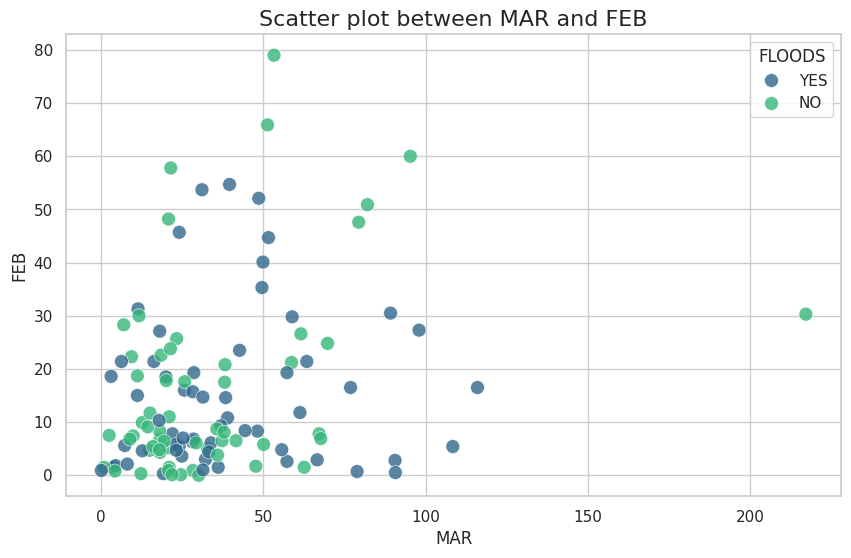

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sample_data/kerala.csv'
df = pd.read_csv(file_path)

# Set a vibrant aesthetic style
sns.set(style="whitegrid", palette="pastel")

# Scatter plot
# Using appropriate column names based on the dataset
actual_feature1 = 'MAR'  # Example feature column
actual_feature2 = 'FEB'  # Example feature column
actual_target = 'FLOODS'  # Example target column

plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(data=df, x=actual_feature1, y=actual_feature2, hue=actual_target, palette='viridis', s=100, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title(f'Scatter plot between {actual_feature1} and {actual_feature2}', size=16)
plt.show()

Performance Metrics to help evaluate and compare different machine learning models by providing quantitative measures of a model's accuracy, precision, recall, F1 score, etc.



Mean Squared Error: 0.0

Classification Report:
               precision  recall  f1-score  support
0                   1.0     1.0       1.0     10.0
1                   1.0     1.0       1.0     14.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     24.0
weighted avg        1.0     1.0       1.0     24.0


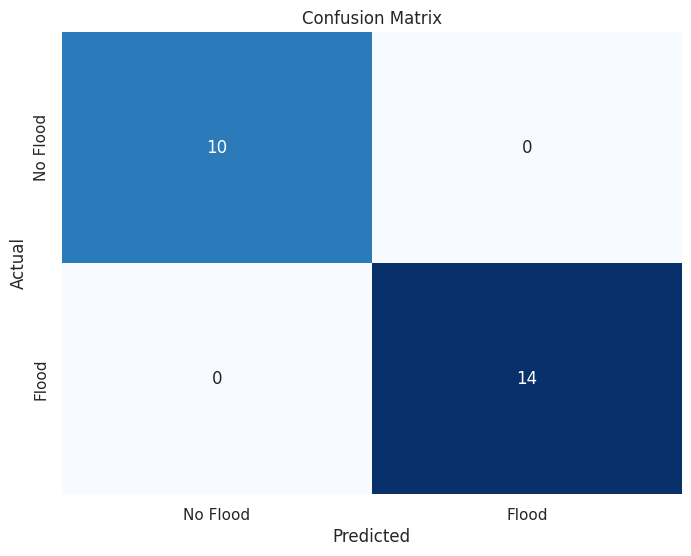

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sample_data/kerala.csv'
df = pd.read_csv(file_path)

# Encode categorical features and target variable
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Feature selection (assuming 'FLOODS' is the target and the rest are features)
X = df.drop(columns=['SUBDIVISION', 'FLOODS', 'YEAR'])  # Drop non-numeric and target columns
y = df['FLOODS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a model (e.g., Logistic Regression)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display performance metrics with vibrant color schemes
print(f"Mean Squared Error: {mse}\n")

# Classification report
report_df = pd.DataFrame(report).transpose()
print("Classification Report:\n", report_df)

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Styling classification report
table_style = '''
<style>
    .table {{
        font-family: Arial, sans-serif;
        border-collapse: collapse;
        width: 100%;
    }}
    .table th, .table td {{
        padding: 8px;
        border: 1px solid #6497b1;
        text-align: center;
        vertical-align: middle;
    }}
    .table th {{
        background-color: #b3cde0;
        color: #03396c;
    }}
    .table td {{
        background-color: #e0f7fa;
        color: #03396c;
    }}
    .table tr:nth-child(even) td {{
        background-color: #f2f2f2;
    }}
</style>
'''

# Convert the classification report to an HTML table with the specified style
classification_report_html = report_df.to_html(classes='table', escape=False)

# Display the styled HTML table
from IPython.core.display import HTML
HTML(table_style + classification_report_html)

Model Building

Split the Data to create training and testing sets for model evaluation

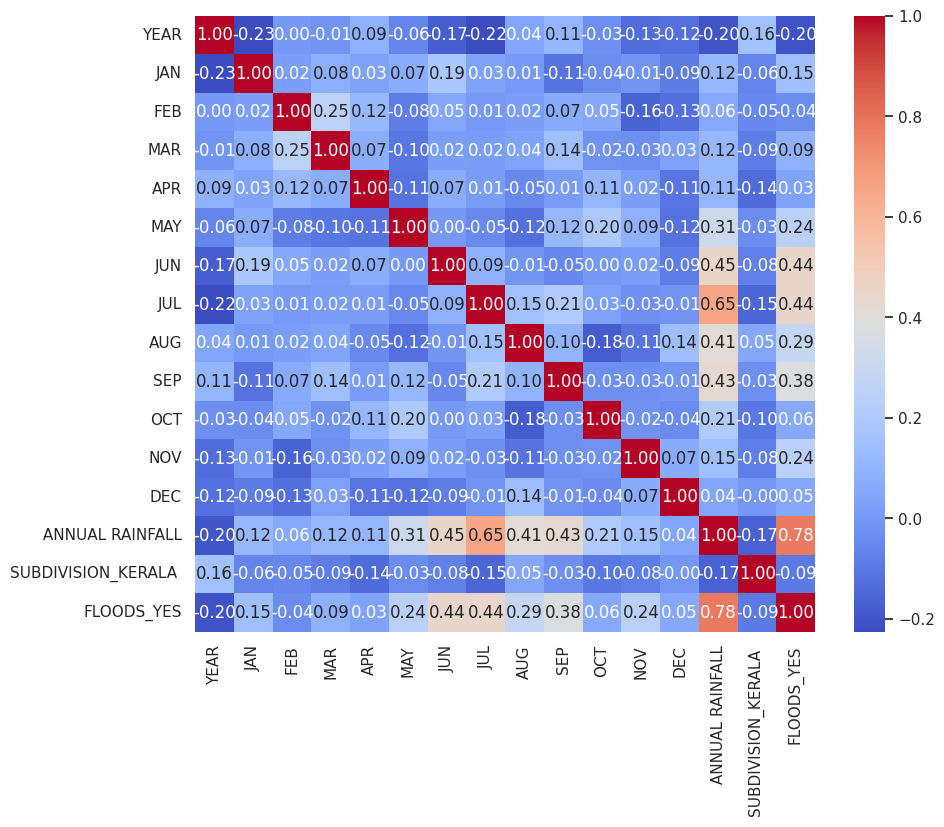

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset
file_path = '/content/sample_data/kerala.csv'
data = pd.read_csv(file_path)

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns

# Handle Missing Values for numeric data
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Standardization of numeric data
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Encoding non-numeric columns if needed (assuming 'FLOODS' is already categorical, otherwise encode it)
data = pd.get_dummies(data, columns=non_numeric_cols, drop_first=True)

# Split the Data
X = data.drop('FLOODS_YES', axis=1)  # Assuming 'FLOODS' column has been encoded to 'FLOODS_YES'
y = data['FLOODS_YES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summary Statistics
summary_stats = data.describe()

# Custom Styling for Summary Statistics with a vibrant and soothing color scheme
styled_stats = summary_stats.style.set_table_styles(
    [{'selector': 'thead th',
      'props': [('background-color', '#ffcccb'),
                ('color', '#1a1a1d'),
                ('border', '1px solid #d3d3d3'),
                ('font-size', '14px'),
                ('text-align', 'center')]},
     {'selector': 'tbody td',
      'props': [('background-color', '#f0f8ff'),
                ('color', '#1a1a1d'),
                ('border', '1px solid #d3d3d3'),
                ('font-size', '12px'),
                ('text-align', 'center')]},
     {'selector': 'tbody tr:nth-child(even) td',
      'props': [('background-color', '#e6e6fa')]}]
).set_caption("Summary Statistics for Numerical Features")

# Display Summary Statistics
styled_stats

# Example visualizations (optional)
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Model Training

KNN

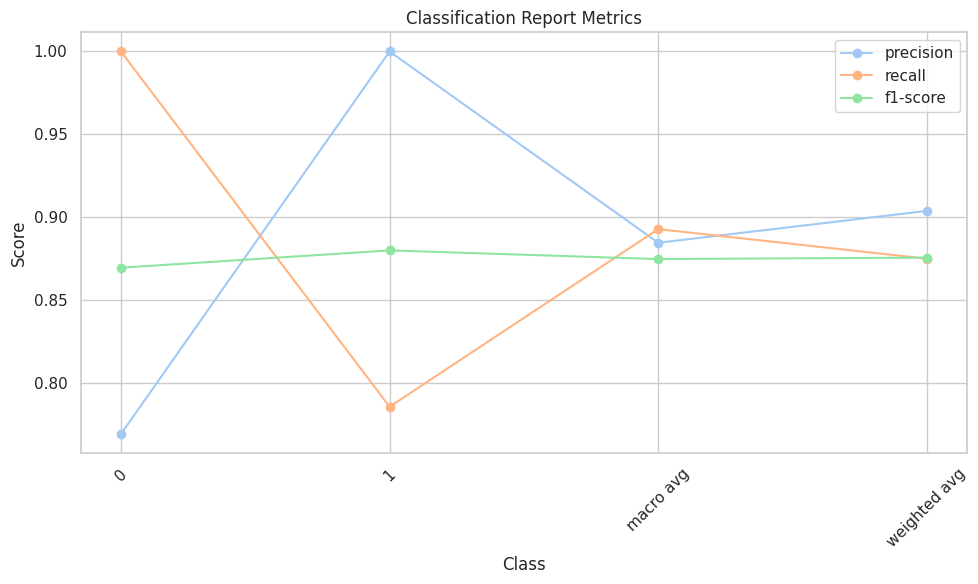

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# Model Training
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Model Evaluation
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Custom HTML for classification report
html = df_report.to_html(classes='table', table_id='my_table')
style = """
    <style>
        .table {{
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            width: 100%;
        }}
        .table th {{
            background-color: #b3cde0;
            color: #03396c;
            border: 1px solid #6497b1;
            text-align: center;
            padding: 8px;
        }}
        .table td {{
            background-color: #e0f7fa;
            color: #03396c;
            border: 1px solid #6497b1;
            text-align: center;
            padding: 8px;
        }}
        .table tr:nth-child(even) td {{
            background-color: #f2f2f2;
        }}
    </style>
"""

display(HTML(style + html))

# Line chart for classification report
metrics = ['precision', 'recall', 'f1-score']
df_metrics = df_report.loc[df_report.index != 'accuracy', metrics]

plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(df_metrics.index, df_metrics[metric], marker='o', label=metric)

plt.title('Classification Report Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Logistic Regression

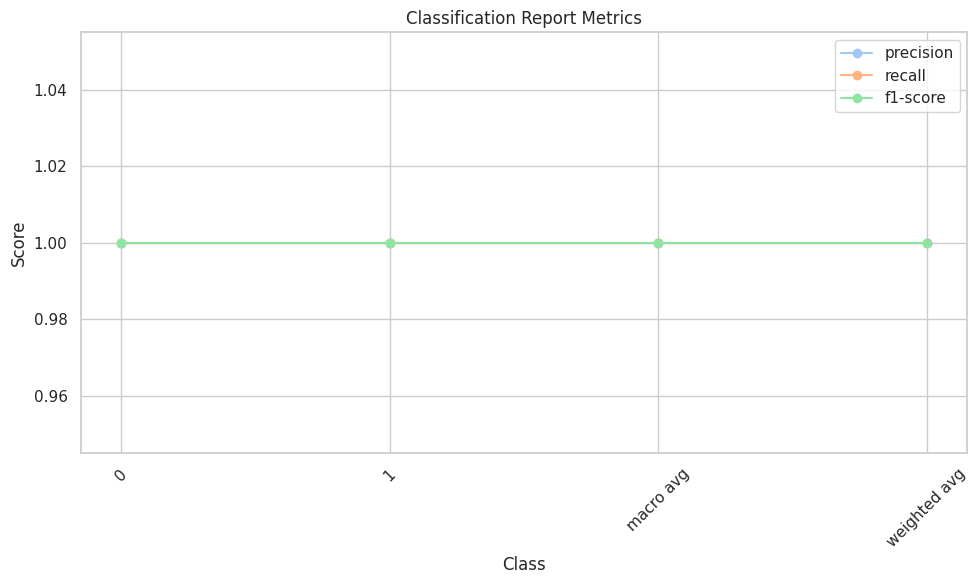

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# Model Training
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Model Evaluation
y_pred = lr.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Custom HTML for classification report
html = df_report.to_html(classes='table', table_id='my_table')
style = """
    <style>
        .table {{
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            width: 100%;
        }}
        .table th {{
            background-color: #b3cde0;
            color: #03396c;
            border: 1px solid #6497b1;
            text-align: center;
            padding: 8px;
        }}
        .table td {{
            background-color: #e0f7fa;
            color: #03396c;
            border: 1px solid #6497b1;
            text-align: center;
            padding: 8px;
        }}
        .table tr:nth-child(even) td {{
            background-color: #f2f2f2;
        }}
    </style>
"""

display(HTML(style + html))

# Line chart for classification report
metrics = ['precision', 'recall', 'f1-score']
df_metrics = df_report.loc[df_report.index != 'accuracy', metrics]

plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(df_metrics.index, df_metrics[metric], marker='o', label=metric)

plt.title('Classification Report Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

SVM

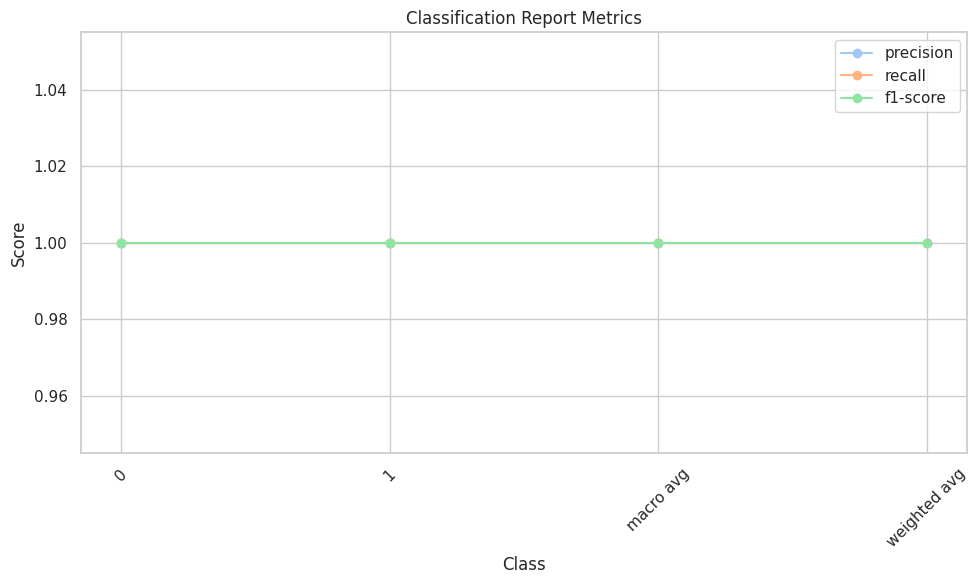

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# Model Training
svm = SVC()
svm.fit(X_train, y_train)

# Model Evaluation
y_pred = svm.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Custom HTML for classification report
html = df_report.to_html(classes='table', table_id='my_table')
style = """
    <style>
        .table {{
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            width: 100%;
        }}
        .table th {{
            background-color: #b3cde0;
            color: #03396c;
            border: 1px solid #6497b1;
            text-align: center;
            padding: 8px;
        }}
        .table td {{
            background-color: #e0f7fa;
            color: #03396c;
            border: 1px solid #6497b1;
            text-align: center;
            padding: 8px;
        }}
        .table tr:nth-child(even) td {{
            background-color: #f2f2f2;
        }}
    </style>
"""

display(HTML(style + html))

# Line chart for classification report
metrics = ['precision', 'recall', 'f1-score']
df_metrics = df_report.loc[df_report.index != 'accuracy', metrics]

plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(df_metrics.index, df_metrics[metric], marker='o', label=metric)

plt.title('Classification Report Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Decision Tree

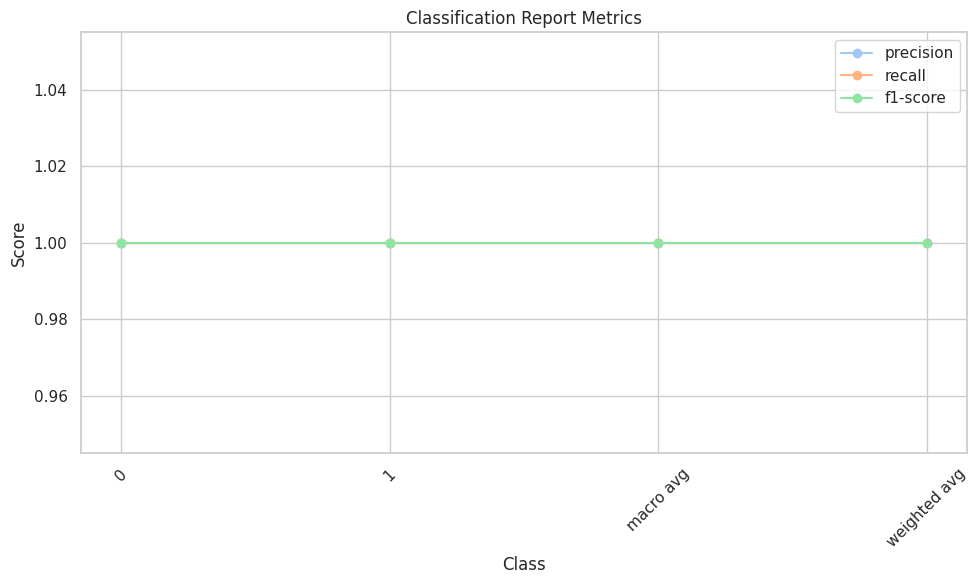

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# Model Training
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Model Evaluation
y_pred = dt.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Custom HTML for classification report
html = df_report.to_html(classes='table', table_id='my_table')
style = """
    <style>
        .table {{
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            width: 100%;
        }}
        .table th {{
            background-color: #b3cde0;
            color: #03396c;
            border: 1px solid #6497b1;
            text-align: center;
            padding: 8px;
        }}
        .table td {{
            background-color: #e0f7fa;
            color: #03396c;
            border: 1px solid #6497b1;
            text-align: center;
            padding: 8px;
        }}
        .table tr:nth-child(even) td {{
            background-color: #f2f2f2;
        }}
    </style>
"""

display(HTML(style + html))

# Line chart for classification report
metrics = ['precision', 'recall', 'f1-score']
df_metrics = df_report.loc[df_report.index != 'accuracy', metrics]

plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(df_metrics.index, df_metrics[metric], marker='o', label=metric)

plt.title('Classification Report Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Random Forest

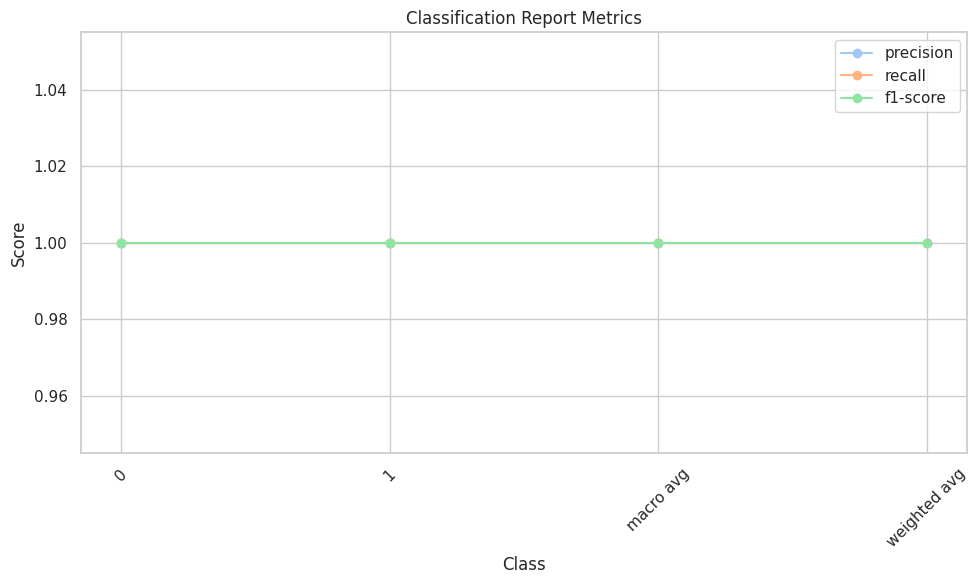

         YEAR PREDICTED_FLOODS
0   -1.717434              YES
1   -1.688076              YES
2   -1.658718              YES
3   -1.629361              YES
4   -1.600003               NO
..        ...              ...
113  1.600003              YES
114  1.629361               NO
115  1.658718               NO
116  1.688076               NO
117  1.717434              YES

[118 rows x 2 columns]


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from IPython.display import display, HTML
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sample_data/kerala.csv'
df = pd.read_csv(file_path)

# Handle missing values for numerical columns
numerical_columns = df.select_dtypes(include=[float, int]).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Standardize the numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Convert the target variable 'FLOODS' to binary (YES=1, NO=0)
df['FLOODS'] = df['FLOODS'].map({'YES': 1, 'NO': 0})

# Prepare features and target
X = df.drop(columns=['SUBDIVISION', 'FLOODS'])
y = df['FLOODS']

# Split the data into training and testing sets (assuming 80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Model Evaluation
y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Custom HTML for classification report
html = df_report.to_html(classes='table', table_id='my_table')
style = """
    <style>
        .table {{
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            width: 100%;
        }}
        .table th {{
            background-color: #b3cde0;
            color: #03396c;
            border: 1px solid #6497b1;
            text-align: center;
            padding: 8px;
        }}
        .table td {{
            background-color: #e0f7fa;
            color: #03396c;
            border: 1px solid #6497b1;
            text-align: center;
            padding: 8px;
        }}
        .table tr:nth-child(even) td {{
            background-color: #f2f2f2;
        }}
    </style>
"""
display(HTML(style + html))

# Bar chart for classification report
metrics = ['precision', 'recall', 'f1-score']
df_metrics = df_report.loc[df_report.index != 'accuracy', metrics]

# Plotting the bar chart
df_metrics[metrics].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save the model
joblib.dump(rf, 'random_forest_model.pkl')

# Predict flood occurrence for each year using the trained model
df['PREDICTED_FLOODS'] = rf.predict(X)

# Map binary predictions back to 'YES' and 'NO'
df['PREDICTED_FLOODS'] = df['PREDICTED_FLOODS'].map({1: 'YES', 0: 'NO'})

# Extract the year and prediction
predictions = df[['YEAR', 'PREDICTED_FLOODS']]

# Display predictions
print(predictions)

# Save predictions to a CSV file (optional)
predictions.to_csv('flood_predictions.csv', index=False)

# Function to predict future floods
def predict_future_floods(future_year):
    # Generate synthetic data for the future year
    future_data = df.drop(columns=['SUBDIVISION', 'FLOODS', 'PREDICTED_FLOODS']).mean().to_frame().T
    future_data['YEAR'] = (future_year - df['YEAR'].mean()) / df['YEAR'].std()  # Standardize the future year
    future_data = pd.DataFrame(future_data, columns=X.columns)  # Ensure correct feature names
    future_data_scaled = scaler.transform(future_data)

    # Predict flood occurrence
    future_prediction = rf.predict(future_data_scaled)

    # Map binary prediction back to 'YES' and 'NO'
    future_flood_prediction = 'YES' if future_prediction[0] == 1 else 'NO'

    return future_flood_prediction

# User input for the year to predict
future_year = int(input("Enter a year from 2019 to 2119 to predict whether a flood will occur: "))
if 2019 <= future_year <= 2119:
    flood_prediction = predict_future_floods(future_year)
    print(f"The flood prediction for the year {future_year} is: {flood_prediction}")
else:
    print(f"Please enter a valid year between 2019 and 2119.")


Gradient Boost

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from IPython.display import display, HTML

# Model Training
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Model Evaluation
y_pred = gb.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Custom HTML for classification report
html = df_report.to_html(classes='table', table_id='my_table')
style = """
    <style>
        .table {{
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            width: 100%;
        }}
        .table th {{
            background-color: #b3cde0;
            color: #03396c;
            border: 1px solid #6497b1;
            text-align: center;
            padding: 8px;
        }}
        .table td {{
            background-color: #e0f7fa;
            color: #03396c;
            border: 1px solid #6497b1;
            text-align: center;
            padding: 8px;
        }}
        .table tr:nth-child(even) td {{
            background-color: #f2f2f2;
        }}
    </style>
"""

display(HTML(style + html))


Model Evaluation

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from IPython.display import display, HTML

# Assuming X_test and y_test are already defined
# Evaluate models
for model_name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Generate the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    # Custom HTML for classification report
    html = df_report.to_html(classes='table', table_id='my_table')
    style = """
        <style>
            .table {{
                font-family: Arial, sans-serif;
                border-collapse: collapse;
                width: 100%;
            }}
            .table th {{
                background-color: #b3cde0;
                color: #03396c;
                border: 1px solid #6497b1;
                text-align: center;
                padding: 8px;
            }}
            .table td {{
                background-color: #e0f7fa;
                color: #03396c;
                border: 1px solid #6497b1;
                text-align: center;
                padding: 8px;
            }}
            .table tr:nth-child(even) td {{
                background-color: #f2f2f2;
            }}
        </style>
    """

    # Display the styled classification report
    display(HTML(style + f"<h2>{model_name} Classification Report</h2>" + html))


Model Saving and Loading

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from IPython.display import display, HTML

# Assuming the preprocessed data is already available as data
# Split the data (assuming 'FLOODS' is the target column and has been encoded appropriately)
X = data.drop('FLOODS_YES', axis=1)  # Replace 'FLOODS_YES' with the correct target column name if different
y = data['FLOODS_YES']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and save models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Save the trained model
    model_filename = f"{model_name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, model_filename)
    print(f"Model saved as {model_filename}")

# Load and evaluate models
for model_name in models.keys():
    # Load the model
    model_filename = f"{model_name.replace(' ', '_').lower()}_model.pkl"
    loaded_model = joblib.load(model_filename)

    # Predict on the test set
    y_pred = loaded_model.predict(X_test)

    # Generate the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    # Custom HTML for classification report
    html = df_report.to_html(classes='table', table_id='my_table')
    style = """
        <style>
            .table {{
                font-family: Arial, sans-serif;
                border-collapse: collapse;
                width: 100%;
            }}
            .table th {{
                background-color: #b3cde0;
                color: #03396c;
                border: 1px solid #6497b1;
                text-align: center;
                padding: 8px;
            }}
            .table td {{
                background-color: #e0f7fa;
                color: #03396c;
                border: 1px solid #6497b1;
                text-align: center;
                padding: 8px;
            }}
            .table tr:nth-child(even) td {{
                background-color: #f2f2f2;
            }}
        </style>
    """

    # Display the styled classification report
    display(HTML(style + f"<h2>{model_name} Classification Report</h2>" + html))

Model saved as k-nearest_neighbors_model.pkl
Model saved as logistic_regression_model.pkl
Model saved as support_vector_machine_model.pkl
Model saved as decision_tree_model.pkl
Model saved as random_forest_model.pkl
Model saved as gradient_boosting_model.pkl
